In [59]:
!jt -t monokai

In [4]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [6]:
# code here
#df = pd.read_csv('https://tinyurl.com/2pfhncqw')
#df

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [7]:
# code here
df2 = pd.read_csv('https://tinyurl.com/2r24n45l')
df2

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [8]:
# There are some bad values in the year column. There are some extra numbers after the actual year. Hence, cleaning:
df2['Year'] = df2['Year'].astype(str).apply(lambda x:x[:4]).astype(np.int64)

# Extracting brand name from name column
df2['Brand'] = df2.Name.str.split().str[0]

# pivot table
df3 = df2[pd.eval('df2.Year in [2018, 2019, 2020, 2021, 2022]')].pivot_table(index='Brand',
                                        columns='Year', values=['Miles', 'Price'], aggfunc={
                                            'Miles' : 'median',
                                            'Price' : 'mean'
                                        })

df3.head()

Miles                                             Price  \
Year      2018     2019     2020     2021     2022          2018   
Brand                                                              
Acura  32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa   38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi   49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW    39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick  50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   

                                                          
Year           2019          2020          2021     2022  
Brand                                                     
Acura  34496.777778  37590.000000  43856.666667      NaN  
Alfa   30475.714286           NaN           NaN      NaN  
Audi   28590.000000  32490.000000  71990.000000  39590.0  
BMW    33280.909091  39811.083333  37062.727273  57030.0  
Buick  21033.632653  24141.947368  25796.842105  26940.0

<Axes: ylabel='Density'>

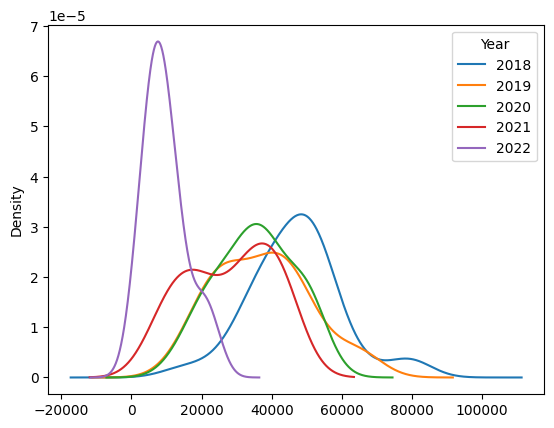

In [9]:
df3['Miles'].plot(kind='kde')

<Axes: ylabel='Density'>

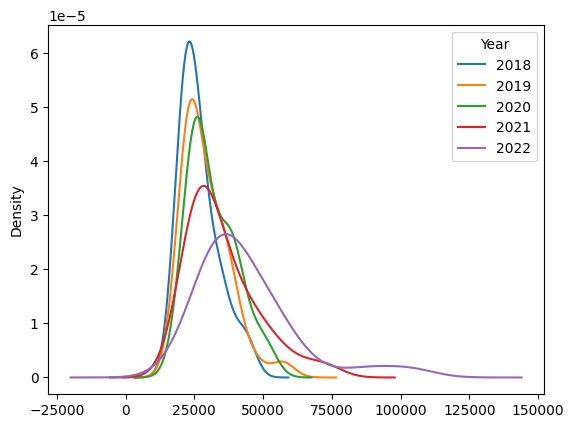

In [10]:
df3['Price'].plot(kind='kde')

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [11]:
# code here
df4 = pd.read_csv('https://tinyurl.com/2nq6kugt')
df4

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0


In [12]:
# Converting to timestamp
df4['Dates'] = pd.to_datetime(df4.Dates)

# Extracting month name
df4['Month'] = df4.Dates.dt.month_name()
df4

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Month
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,September
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,September
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,September
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,September
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,September
...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,April
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,April
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,April
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,April


In [14]:
df4.pivot_table(index='Power Station', columns='Month', values=df4.columns[2:-1])

Actual(MU)                                              \
Month              April     August   December   February    January   
Power Station                                                          
0                    NaN        NaN        NaN        NaN        NaN   
ABAN POWR       0.600000   0.780645   0.858757   0.843972   0.870968   
ACB             4.225000   3.812903   4.265537   4.397163   3.754839   
ACPL            0.000000   0.000000   0.000000   0.000000   0.000000   
ADHPL           0.608333   3.761290   0.000000   0.000000   0.000000   
...                  ...        ...        ...        ...        ...   
VESPL           0.000000   0.000000   0.000000   0.000000   0.000000   
VIP             1.466667   1.006452   3.451977   1.191489   2.561290   
VVL             0.000000   0.000000   0.000000   0.000000   0.000000   
WPCL           35.133333  31.354839  27.271186  26.808511  26.787097   
West Bengal    90.808333  73.116129  78.322034  82.971631  79.883871   

                                                                      \
Month               July       June      March        May   November   
Power Station                                                          
0                    NaN        NaN        NaN        NaN        NaN   
ABAN POWR       1.058442   0.886667   1.130841   0.798387   0.821229   
ACB             4.175325   4.600000   4.654206   4.290323   4.480447   
ACPL            0.000000   0.000000   0.000000   0.000000   0.000000   
ADHPL           4.194805   2.633333   0.051402   1.298387   0.011173   
...                  ...        ...        ...        ...        ...   
VESPL           0.000000   0.000000   0.000000   0.000000   0.000000   
VIP             1.389610   1.353333   1.485981   1.491935   3.083799   
VVL             0.000000   0.000000   0.000000   0.000000   0.000000   
WPCL           29.779221  25.866667  28.355140  33.072581  25.318436   
West Bengal    79.675325  82.673333  84.457944  84.120968  74.983240   

                                    Deviation                             \
Month            October  September     April August   December February   
Power Station                                                              
0              14.925000        NaN       NaN    NaN        NaN      NaN   
ABAN POWR       0.945455   0.783333 -4.308917    0.0 -11.299435      0.0   
ACB             4.006061   3.450000  4.888583    0.0  -2.897740      0.0   
ACPL            0.000000   0.000000  0.000000    0.0   0.000000      0.0   
ADHPL           0.945455   2.100000  3.676083    0.0   3.024972      0.0   
...                  ...        ...       ...    ...        ...      ...   
VESPL           0.000000   0.000000  0.000000    0.0   0.000000      0.0   
VIP             3.163636   3.261111  0.000000    0.0   0.000000      0.0   
VVL             0.000000   0.000000  0.000000    0.0   0.000000      0.0   
WPCL           28.539394  24.116667 -0.649917    0.0   1.186893      0.0   
West Bengal    79.259459  76.400000 -0.407917    0.0   4.007740      0.0   

                                                                             \
Month         January July June     March  May   November October September   
Power Station                                                                 
0                 NaN  NaN  NaN       NaN  NaN        NaN     0.0       NaN   
ABAN POWR         0.0  0.0  0.0 -0.275421  0.0 -10.055866     0.0       0.0   
ACB               0.0  0.0  0.0  0.140935  0.0  -3.862905     0.0       0.0   
ACPL              0.0  0.0  0.0  0.000000  0.0   0.000000     0.0       0.0   
ADHPL             0.0  0.0  0.0  0.551168  0.0   1.784469     0.0       0.0   
...               ...  ...  ...       ...  ...        ...     ...       ...   
VESPL             0.0  0.0  0.0  0.000000  0.0   0.000000     0.0       0.0   
VIP               0.0  0.0  0.0  0.000000  0.0   0.000000     0.0       0.0   
VVL               0.0  0.0  0.0  0.000000  0.0   0.000000     

<Axes: xlabel='Power Station'>

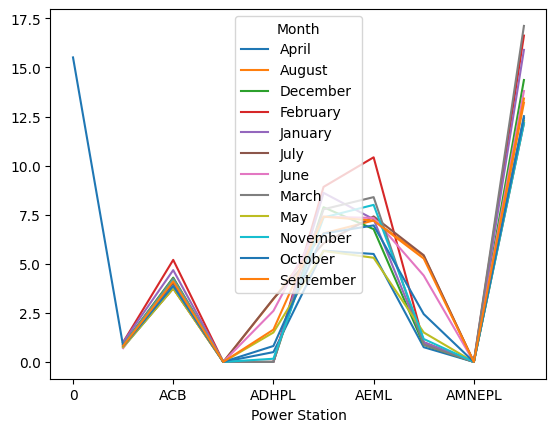

In [19]:
df4.pivot_table(index='Power Station', columns='Month', values='Programme or Expected(MU)').head(10).plot(kind='line')

### `Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [22]:
# code here
df5 = pd.read_csv(r"C:\Aditya Joshi\ML and DS\Datasets\question-answer.csv")
df5

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?
5,5,Ans3-A random forest is built up of a number o...
6,6,Q4-How can you avoid overfitting your model?
7,7,Ans4-Overfitting refers to a model that is onl...
8,8,Q5-You are given a data set consisting of vari...
9,9,Ans5-The following are ways to handle missing ...


In [34]:
df6 = pd.DataFrame()

df6['Question'] = df5[~df5['2'].str.startswith('Ans')]['2'].values
df6['Answers'] = df5[df5['2'].str.startswith('Ans')]['2'].values
df6

,Question,Answers
0,Q1-What is Data Science?,"Ans1-Data Science combines statistics, maths, ..."
1,Q2-2. How is logistic regression done?,Ans2-Logistic regression measures the relation...
2,Q3-How do you build a random forest model?,Ans3-A random forest is built up of a number o...
3,Q4-How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...
4,Q5-You are given a data set consisting of vari...,Ans5-The following are ways to handle missing ...
5,Q6-What is bag of words? How we can use it for...,Ans6-Bag of Words is a representation of text ...
6,Q7-How can we use machine learning for text cl...,Ans7-Machine learning classification algorithm...
7,Q8-What is a time series?,Ans8-A time series is a set of observations or...
8,Q9-How is time series different from the usual...,Ans9-The principle behind causal forecasting i...
9,Q10-What are the different types of joins? Wha...,Ans10-(INNER) JOIN: Returns records that have ...


### `Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [37]:
# code here
df6[~df6['Question'].str.endswith('?')]

,Question,Answers


### `Q 6-10` LOG and EMPLOYEE 
6. Show `activity` details month wise. Show count for each `activity` 
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [39]:
# code here
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [50]:
log_file['dt'] = pd.to_datetime(log_file['dt'])
log_file['Month'] = log_file['dt'].dt.month_name()
log_file

,Log_ID,dt,dept,emp_id,activity,eqpt,Month
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January
4,1004,2022-01-11,Dept3,138,Checking,Battery,January
...,...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC,January
361,1361,2023-01-03,Dept4,116,Checking,Server,January
362,1362,2023-01-04,Dept4,110,Checking,CPU,January
363,1363,2023-01-05,Dept4,102,Inspection,AC,January


In [67]:
log_file.set_index(['activity', 'Month'])

Log_ID         dt   dept  emp_id       eqpt
activity   Month                                               
Cleaning   January    1000 2022-01-07  Dept6     115        UPS
           January    1001 2022-01-08  Dept4     105  Generator
Inspection January    1002 2022-01-09  Dept3     112        CPU
           January    1003 2022-01-10  Dept4     120        UPS
Checking   January    1004 2022-01-11  Dept3     138    Battery
...                    ...        ...    ...     ...        ...
Repair     January    1360 2023-01-02  Dept2     122         AC
Checking   January    1361 2023-01-03  Dept4     116     Server
           January    1362 2023-01-04  Dept4     110        CPU
Inspection January    1363 2023-01-05  Dept4     102         AC
Cleaning   January    1364 2023-01-06  Dept3     128         AC

[365 rows x 5 columns]

In [72]:
# Show activity details month wise. Show count for each activity

log_file[['activity', 'Month']].value_counts().unstack()

Month,April,August,December,February,January,July,June,March,May,November,October,September
activity,,,,,,,,,,,,
Checking,5,8,6,7,7,6,5,8,5,8,13,8
Cleaning,11,10,7,7,10,6,7,6,8,9,4,3
Inspection,9,9,12,4,9,14,8,5,7,6,5,12
Repair,5,4,6,10,5,5,10,12,11,7,9,7


In [105]:
# Find employee who did most activity in January month.

df7 = employee.merge(log_file, left_on='EMPLOYEE_ID', right_on='emp_id', how='outer')
df7[df7['Month'] == 'January'].groupby(['emp_id', 'FIRST_NAME', 'LAST_NAME'])['activity'].count().sort_values().tail(1)

emp_id  FIRST_NAME  LAST_NAME
122     Payam       Kaufling     3
Name: activity, dtype: int64

In [107]:
# Employee who have worked most no of times on Weekends.

df7['isWeekend'] = df7.dt.dt.day_name().isin(['Saturday', 'Sunday'])
df7[df7.isWeekend].groupby(['emp_id', 'FIRST_NAME', 'LAST_NAME'])['activity'].count().sort_values().tail(1)

emp_id  FIRST_NAME  LAST_NAME
109     Daniel      Faviet       5
Name: activity, dtype: int64

In [113]:
# Which activity is logged most on buisness days.

df7[~df7.isWeekend]['activity'].value_counts().sort_values(ascending=True).tail(1)

Inspection    77
Name: activity, dtype: int64

In [120]:
# Week Days wise activity table

df7['Day'] = df7.dt.dt.day_name()
df7[['activity', 'Day']].value_counts().unstack().T

activity,Checking,Cleaning,Inspection,Repair
Day,,,,
Friday,8,16,20,9
Monday,10,14,13,15
Saturday,18,11,8,15
Sunday,13,13,15,11
Thursday,8,16,16,12
Tuesday,15,9,15,13
Wednesday,14,9,13,16


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname). 

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [122]:
# code here
employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [137]:
# There are missing value in first name of employee. Fill it using email and last name field.

employee.FIRST_NAME = employee.FIRST_NAME.fillna(employee.EMAIL.str[:2])
employee.FIRST_NAME

0        Steven
1         Neena
2           Lex
3     Alexander
4         Bruce
5         David
6         Valli
7         Diana
8         Nancy
9        Daniel
10         John
11       Ismael
12           JM
13         Luis
14          Den
15    Alexander
16       Shelli
17        Sigal
18          Guy
19        Karen
20      Matthew
21           AF
22        Payam
23       Shanta
24        Kevin
25        Julia
26        Irene
27        James
28       Steven
29        Laura
30        Mozhe
31        James
32           TJ
33        Jason
34      Michael
35           Ki
36        Hazel
37       Renske
38      Stephen
39         John
40       Joshua
Name: FIRST_NAME, dtype: object

In [130]:
# You can see email field don't have any domain name. Change this to full email addreess 
# with domain as 'campusx.com'. E.g- Email field -> JMURMAN result -> JMURMAN@CAMPUSX.COM

employee.EMAIL = employee.EMAIL + '@CAMPUSX.COM'

In [131]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING@CAMPUSX.COM
1,101,Neena,Kochhar,NKOCHHAR@CAMPUSX.COM
2,102,Lex,De Haan,LDEHAAN@CAMPUSX.COM
3,103,Alexander,Hunold,AHUNOLD@CAMPUSX.COM
4,104,Bruce,Ernst,BERNST@CAMPUSX.COM
5,105,David,Austin,DAUSTIN@CAMPUSX.COM
6,106,Valli,Pataballa,VPATABAL@CAMPUSX.COM
7,107,Diana,Lorentz,DLORENTZ@CAMPUSX.COM
8,108,Nancy,Greenberg,NGREENBE@CAMPUSX.COM
9,109,Daniel,Faviet,DFAVIET@CAMPUSX.COM


In [154]:
# Show Full Name of all the employees whose name starts with 'A' 
# and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

#employee[employee.FIRST_NAME.str.startswith('A')]
df7.FIRST_NAME = df7.FIRST_NAME.fillna(df7.EMAIL.str[:2])
df7.dropna()[df7.dropna().FIRST_NAME.str.startswith('A') & df7.dropna().activity.isin(['Incpection', 'Cleaning', 'Checking'])]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,emp_id,activity,eqpt,Month,isWeekend,Day
26,103.0,Alexander,Hunold,AHUNOLD,1093,2022-04-10,Dept2,103,Checking,AC,April,True,Sunday
28,103.0,Alexander,Hunold,AHUNOLD,1224,2022-08-19,Dept1,103,Cleaning,AC,August,False,Friday
30,103.0,Alexander,Hunold,AHUNOLD,1294,2022-10-28,Dept6,103,Checking,Battery,October,False,Friday
108,115.0,Alexander,Khoo,AKHOO,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,False,Friday
109,115.0,Alexander,Khoo,AKHOO,1038,2022-02-14,Dept2,115,Cleaning,Fan,February,False,Monday
112,115.0,Alexander,Khoo,AKHOO,1293,2022-10-27,Dept4,115,Checking,CPU,October,False,Thursday
113,115.0,Alexander,Khoo,AKHOO,1322,2022-11-25,Dept2,115,Cleaning,Fan,November,False,Friday
115,115.0,Alexander,Khoo,AKHOO,1332,2022-12-05,Dept3,115,Checking,UPS,December,False,Monday
